In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.models import load_model, Model
import matplotlib.pyplot as plt
import os
import numpy as np
from google.colab import drive
from keras.applications.xception import preprocess_input
import matplotlib.cm as cm
from IPython.display import Image, display

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
model = load_model("")
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
def get_img_array(img_path, size):
    img =load_img(img_path, target_size=size)
    array = img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
img_array = preprocess_input(get_img_array("", size=(128, 128, 3)))

In [ ]:
last_conv_layer = model.get_layer('block5_conv1')
heatmap_model = Model([model.input], [last_conv_layer.output, model.output])
with tf.GradientTape() as tape:
    conv_output, predictions = heatmap_model(img_array)
    loss = predictions[0]
grads = tape.gradient(loss, conv_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_output = conv_output[0]
heatmap = conv_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

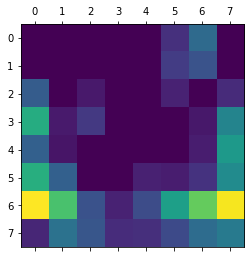

In [ ]:
plt.matshow(heatmap)
plt.show()

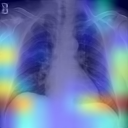

In [ ]:
img = load_img("")
img = img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")

jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = img_to_array(jet_heatmap)

alpha=0.8
superimposed_img = jet_heatmap * alpha + img
superimposed_img = array_to_img(superimposed_img)

superimposed_img.save("")

display(Image(""))